# Bibliotecas e constantes

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import scipy as sp # biblioteca para transformada de fourier
import control as ct
from scipy import interpolate
from control.matlab import *
import Polinomial as pol
s = ct.TransferFunction.s
z = ct.TransferFunction.z
%matplotlib inline

sin = np.sin
pi = np.pi

1

Modelo contínuo

array([-1.14285714+1.55928726j, -1.14285714-1.55928726j])

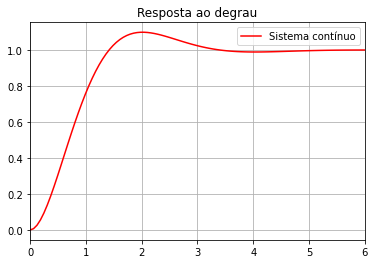

In [2]:
os = 10
ts = 3.5
zeta = (-np.log(os/100))/(np.sqrt(pi**2 + np.log(os/100)**2))
Wn = 4/(ts*zeta)
Xi = 0.375                                #Posição do ator
Vs = Xi*(2.5/1.5) + 2.5                    #Tensão no sensor (de 0 a 5, sendo 2,5 o meio)
K = (Vs-2.5)/(2.5)                      #Sensor de posição influenciando no ganho
G = (Wn**2)/(s**2 + 2*Wn*zeta*s + Wn**2) #Função de transferência da câmera
Gs = K*G
tc, yc = ct.step_response(G)

plt.figure(1)
plt.title("Resposta ao degrau")
plt.plot(tc.T, yc.T,'r',label='Sistema contínuo')
plt.xlim(0,6)
#plt.ylim(0,1.2)
plt.legend()
plt.grid()

ct.pole(G)

Modelo discreto


4.654e-05 z + 4.636e-05
-----------------------
z^2 - 1.989 z + 0.9886

dt = 0.005



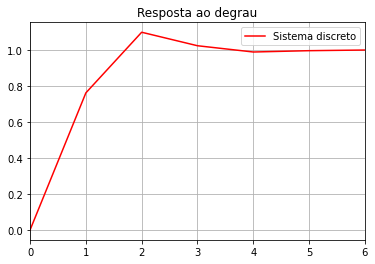

In [3]:
Ts = 0.1
dt = Ts/20
Gz = c2d(G,dt)

syl1 = pol.SylvesterZ(Gz)
print(Gz)
tc = np.arange(0,10,dt)
tcz, ycz = ct.step_response(Gz)

plt.figure(1)
plt.title("Resposta ao degrau")
plt.plot(tcz.T, ycz.T,'r',label='Sistema discreto')
plt.xlim(0,6)
plt.legend()
plt.grid()

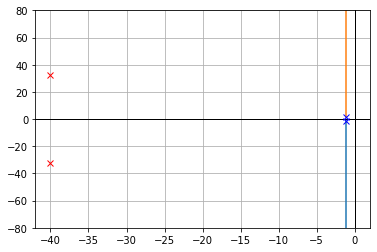


	Zeros do sistema -> [] 
	Polos do sistema -> [-1.14285714+1.55928726j -1.14285714-1.55928726j] 
	Polos do desempenho -> [(-39.99999999999999+32.12243536636324j), (-39.99999999999999-32.12243536636324j)]


In [4]:
G1 = G
sylv1 = pol.Sylvester(G1)
P1 = sylv1.PolosOS(0.1,2)
r, k =ct.root_locus(G1, Plot=False)

fig, ax = plt.subplots()
ax.axhline(y=0, color='k', linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
for i in r.T:
        plt.plot(i.real,i.imag)
plt.plot(ct.pole(G1).real,ct.pole(G1).imag,'xb')
plt.plot(ct.zero(G1).real,ct.zero(G1).imag,'oc')
for n in P1:
    plt.plot(n.real,n.imag,'xr')
plt.grid()
#plt.xlim(-1.2,-1)
plt.ylim(-80,80)
plt.show(block=False)

print('\n\tZeros do sistema -> {0} \n\tPolos do sistema -> {1} \n\tPolos do desempenho -> {2:}'.format(ct.zero(G1),ct.pole(G1),P1))

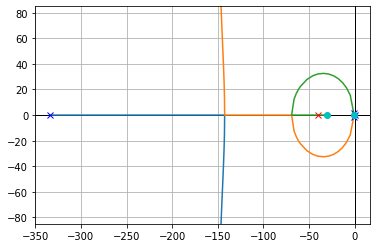


	K = 550.2552920331813 
	Polos -> [-254.2521905  +0.j          -40.51531642-32.11808217j
  -40.51531642+32.11808217j   -0.33622429 +0.j        ]

	Zeros do sistema -> [-29.99659477  -0.33673856] 
	Polos do sistema -> [-333.33333333+0.j           -1.14285714+1.55928726j
   -1.14285714-1.55928726j    0.        +0.j        ] 
	Polos do desempenho -> [(-40+0j)]


In [5]:
Kp = 1
Ti = 3
Td = .03#p/ pid 1o 0.03
N = 10   #p/ pid 1o 10
pid = ((Ti*Td+Ti*Td*N)*s**2+(Ti*N+Td)*s+N)/(Ti*s*(Td*s+N))
pi  = (Ti*s+1)/(Ti*s)
pd  = (2*Td*s+N)/(Td*s+N)
Cpid = Kp*pid

MA = series(Cpid,G)

sylv1 = pol.Sylvester(G1)
P1 = sylv1.PolosOS(0.1,0)
r, k =ct.root_locus(MA, Plot=False)

fig, ax = plt.subplots()
ax.axhline(y=0, color='k', linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
for i in r.T:
        plt.plot(i.real,i.imag)
plt.plot(ct.pole(MA).real,ct.pole(MA).imag,'xb')
plt.plot(ct.zero(MA).real,ct.zero(MA).imag,'oc')
for n in P1:
    plt.plot(n.real,n.imag,'xr')
plt.grid()
#plt.xlim(-20,1)
plt.ylim(-85,85)
plt.show(block=False)

c=0
for i in r:
    for j in i:
        if -42 < j.real <-38 and -34<j.imag<-30:
            print('\n\tK = {0} \n\tPolos -> {1}'.format(k[c],i))
    c +=1
print('\n\tZeros do sistema -> {0} \n\tPolos do sistema -> {1} \n\tPolos do desempenho -> {2:}'.format(ct.zero(MA),ct.pole(MA),P1))

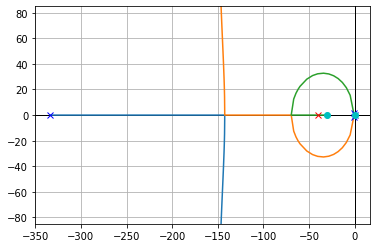


	K = 1014.8438965053635 
	Polos -> [-1.46852182e+02-92.77997757j -1.46852182e+02+92.77997757j
 -4.18144745e+01 +0.j         -1.00208386e-01 +0.j        ]

	K = 1031.9491533907208 
	Polos -> [-1.47051890e+02-96.71316989j -1.47051890e+02+96.71316989j
 -4.14150575e+01 +0.j         -1.00209934e-01 +0.j        ]

	K = 1100.3701809321494 
	Polos -> [-1.47719297e+02-110.94475046j -1.47719297e+02+110.94475046j
 -4.00802384e+01  +0.j         -1.00215648e-01  +0.j        ]

	K = 1169.1433172404088 
	Polos -> [-1.48237032e+02-123.48454813j -1.48237032e+02+123.48454813j
 -3.90447630e+01  +0.j         -1.00220719e-01  +0.j        ]

	K = 1237.916453548668 
	Polos -> [-1.48650786e+02-134.78404778j -1.48650786e+02+134.78404778j
 -3.82172500e+01  +0.j         -1.00225226e-01  +0.j        ]

	Zeros do sistema -> [-30.21181931  -0.10030191] 
	Polos do sistema -> [-333.33333333+0.j           -1.14285714+1.55928726j
   -1.14285714-1.55928726j    0.        +0.j        ] 
	Polos do desempenho -> [(-40+0j)]

In [6]:
Kp = 1
Ti = 10
Td = 0.03#p/ pid 1o 0.03
N = 10   #p/ pid 1o 10
pid = ((Ti*Td+Ti*Td*N)*s**2+(Ti*N+Td)*s+N)/(Ti*s*(Td*s+N))
pi  = (Ti*s+1)/(Ti*s)
pd  = (2*Td*s+N)/(Td*s+N)
Cpid = Kp*pid

MA = series(Cpid,G)

sylv1 = pol.Sylvester(G1)
P1 = sylv1.PolosOS(0.1,0)
r, k =ct.root_locus(MA, Plot=False)

fig, ax = plt.subplots()
ax.axhline(y=0, color='k', linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
for i in r.T:
        plt.plot(i.real,i.imag)
plt.plot(ct.pole(MA).real,ct.pole(MA).imag,'xb')
plt.plot(ct.zero(MA).real,ct.zero(MA).imag,'oc')
for n in P1:
    plt.plot(n.real,n.imag,'xr')
plt.grid()
#plt.xlim(-20,1)
plt.ylim(-85,85)
plt.show(block=False)

c=0
for i in r:
    for j in i:
        if -42 < j.real <-38 and j.imag==0:
            print('\n\tK = {0} \n\tPolos -> {1}'.format(k[c],i))
    c +=1
print('\n\tZeros do sistema -> {0} \n\tPolos do sistema -> {1} \n\tPolos do desempenho -> {2:}'.format(ct.zero(MA),ct.pole(MA),P1))

{'RiseTime': 0.009000000000000001,
 'SettlingTime': 0.079,
 'SettlingMin': 0.9338875584338322,
 'SettlingMax': 1.1921296922360576,
 'Overshoot': 19.296968721046333,
 'Undershoot': 0.0,
 'Peak': 1.1921296922360576,
 'PeakTime': 0.023,
 'SteadyStateValue': 0.999295879029106}

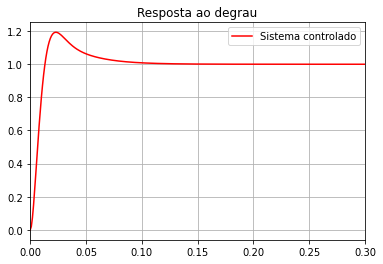

In [7]:
Kp = 1100
Cpid = Kp*pid
MF = feedback(Cpid*G)

tc = np.arange(0,2,0.001)
tg, yg = ct.step_response(MF,T=tc)

plt.figure(1)
plt.title("Resposta ao degrau")
plt.plot(tg.T, yg.T,'r',label='Sistema controlado')
plt.xlim(0,0.3)
#plt.ylim(0,1.2)
plt.legend()
plt.grid()
stepinfo(MF,tc)

G(z) = 
8.263e-05 z + 8.222e-05
-----------------------
z^2 - 1.985 z + 0.9849

dt = 0.006666666666666667
 

Cv(z) = 
6051 z^2 - 8800 z + 4950
------------------------
        z^2 + z

dt = 0.006666666666666667
 

Cp(z) = 
5830 z^2 - 1100 z - 3630
------------------------
      2 z^2 + 2 z

dt = 0.006666666666666667



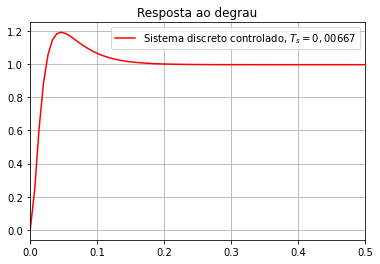

In [10]:
Ts = 0.1 #1/4
dt = Ts/15
Gz = c2d(G,dt)
b = (dt/Ti)*Kp
c = (Td/dt)*Kp
Cpidv = ct.tf([Kp+b+c,-2*c+Kp,c],[1,1,0],dt)  #Kp+(b/(1-z**-1))+(c*(1-z**-1)) pid velocidade
Cpidp = ct.tf([2*Kp+b*c,-Kp,-b*c],[2,2,0],dt)  #Kp+(b*(1+z**-1)*c*(1-z**-1)/2*(1-z**-1)) pid posição

tc = np.arange(0,10,dt)
MFd = feedback(Cpidp*Gz)
tg, yg = ct.step_response(MFd,T=tc)

plt.figure(1)
plt.title("Resposta ao degrau")
plt.plot(tg.T, yg.T,'r',label='Sistema discreto controlado, $T_s = 0,00667$')
plt.xlim(0,.5)
#plt.ylim(0,1.2)
plt.legend()
plt.grid()

print("G(z) = {0} \n\nCv(z) = {1} \n\nCp(z) = {2}".format(Gz,Cpidv,Cpidp))

(array([-1.00018028,  0.8275604 ,  0.63053501,  0.28591895]),
 array([ 0.88903546, -0.99493349, -0.70035621]))

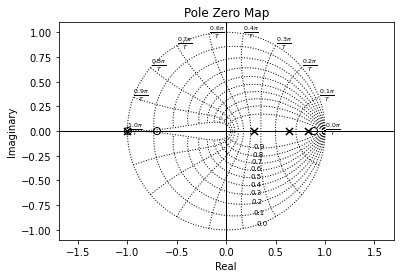

In [52]:
pzmap(MFd,grid=True)

2

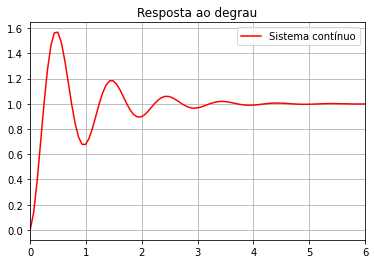

In [505]:
Kcr =  1111111111111111
MF = feedback(Kcr*G)
tc, yc = ct.step_response(G)


plt.figure(1)
plt.title("Resposta ao degrau")
plt.plot(tc.T, yc.T,'r',label='Sistema contínuo')
plt.xlim(0,6)
#plt.ylim(0,1.2)
plt.legend()
plt.grid()
